### Objective:

- Thera Bank is interested in converting its liability customers to personal loan customers while retaining them as depositors.
A campaign that ran last year showed a conversion rate of 9%. This year they are interested in increasing the conversion rate by targeting high probability customers.

<strong>Objective of this project is to implement a model that predicts those customers who are most likely to accept the "Personal Loan" Offer</strong>

In [1]:
# Import required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

# Import necessary modules
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
# Reading the dataset
data = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
data.shape

(5000, 14)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
# Null value check

data.isna().apply(pd.value_counts)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
False,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000,5000


In [6]:
data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

Observation: No missing values. No columns have null data in the file.

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


Observation: 'Experience' field has negative values.

In [8]:
data[data.Experience < 0].Experience.count()

52

There are 52 values with negative experience, which is incorrect. We have to clean that column.

In [9]:
neglist = data.loc[data.Experience < 0]['ID']
dfpex = data.loc[data.Experience > 0]

In [10]:
for id in neglist:
    age = data.loc[np.where(data['ID']==1)]["Age"].tolist()[0]
    education = data.loc[np.where(data['ID']==1)]["Education"].tolist()[0]
    df_filtered = dfpex[(dfpex.Age == age) & (dfpex.Education == education)]
    data.loc[data.loc[np.where(data['ID']==id)].index, 'Experience'] = df_filtered.Experience.median()

Replaced the negative values with median of positive data having same Age and Education

Re-Checking if there are any records with negative experience

In [11]:
data[data.Experience < 0].Experience.count()

0

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.130000,11.422626,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


#### Influence of different attributes on Personal Loan

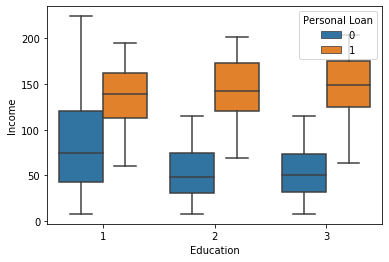

In [13]:
sns.boxplot(x="Education", y="Income", hue="Personal Loan", data=data)

#### Observation:

-  Education level 1 has higher incomes
- Customers who go for loan have almost same income distribution regardless of education level

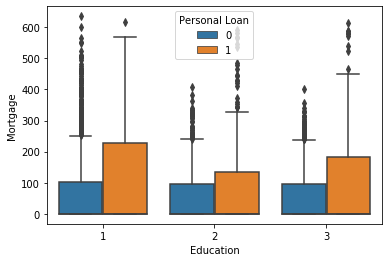

In [14]:
sns.boxplot(x="Education", y="Mortgage", hue="Personal Loan", data=data)

#### Observation:

- Customers having high mortgage have taken loan

In [15]:
zip = data[data['Personal Loan']==1]['ZIP Code'].value_counts().head(5)
zip

94720    19
94305    13
92093     9
90095     8
90089     8
Name: ZIP Code, dtype: int64

#### Observation:
- Above locations are the top-5 who applied for loan before

#### Analysis of Categorical variables

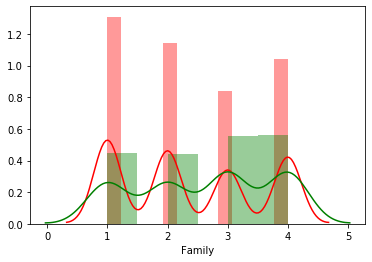

In [16]:
sns.distplot(data[data['Personal Loan'] == 0]['Family'], color = 'r')
sns.distplot(data[data['Personal Loan'] == 1]['Family'], color = 'g')

#### Observation:
- Family size seems to have <strong>no impact</strong> on decision to take a loan

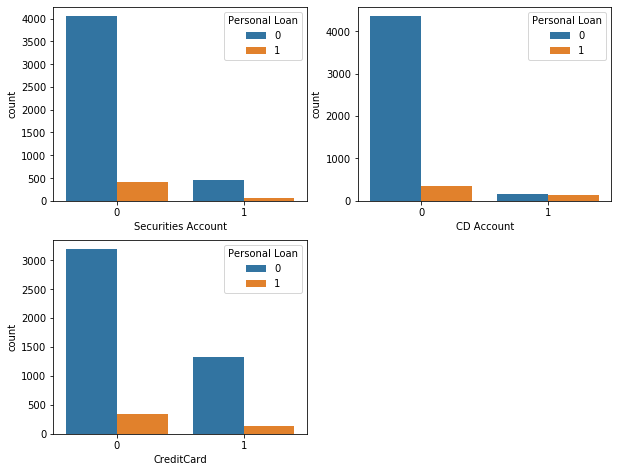

In [17]:
plt.figure(figsize=(10,25))
plt.subplot(6,2,1)
sns.countplot(x="Securities Account", data=data, hue="Personal Loan")
plt.subplot(6,2,2)
sns.countplot(x="CD Account", data=data, hue="Personal Loan")
plt.subplot(6,2,3)
sns.countplot(x="CreditCard", data=data, hue="Personal Loan")

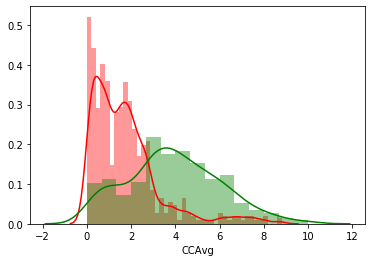

In [18]:
sns.distplot(data[data['Personal Loan'] == 0]['CCAvg'], color = 'r')
sns.distplot(data[data['Personal Loan'] == 1]['CCAvg'], color = 'g')

#### Observation:
- Customers who have taken Personal Loan have higher Credit card average than those whose have not

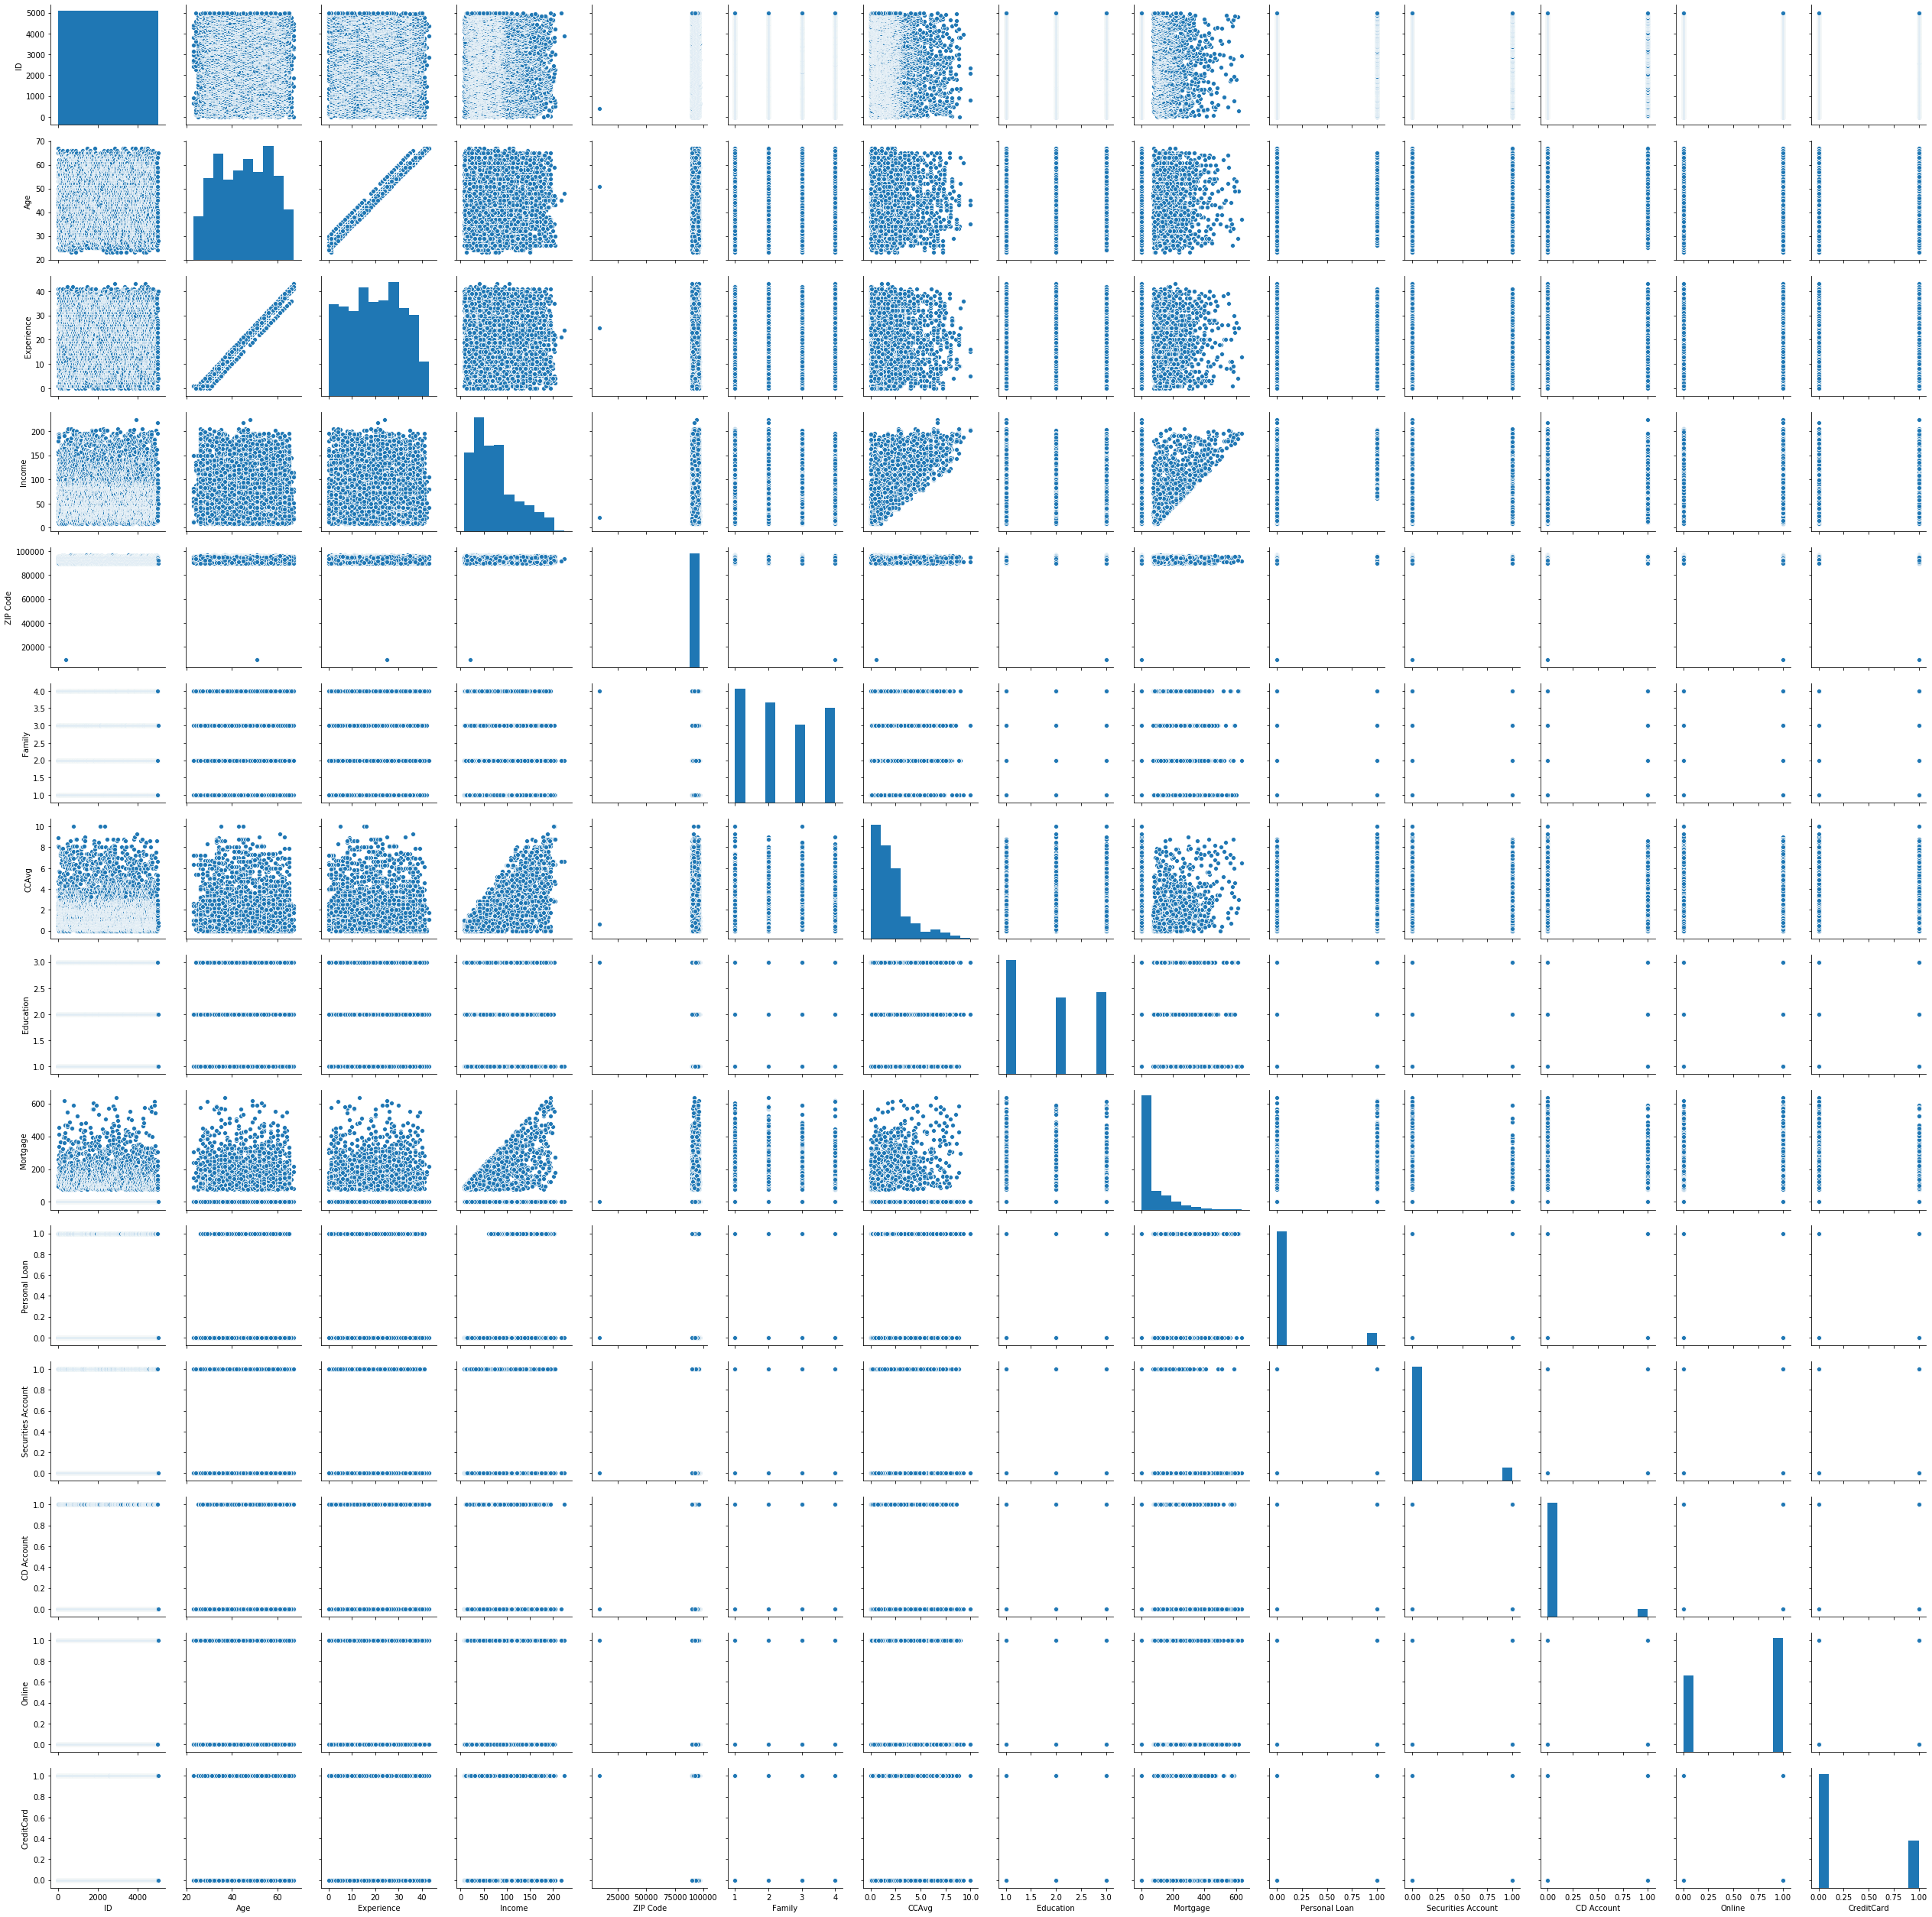

In [19]:
sns.pairplot(data)

#### Observations:
- Age: Normally distributed with majority of customers falling between 35 and 55 years. From describe output, we can see mean is almost equal to median.

- Experience: Normally distributed with more customers having experience starting from 10 to 30 years. Mean is almost equal to median. There are some negative values which could be due to errors in dataset. So those samples need to be cleaned.

- Age and Experience are linearly related

- Income: Positively skewed with income of majority customers between 45K and 55K. Mean > Median

- CCAvg: Positively skewed, average spending is between 0K to 10K and Majority spends less than 2.5K

- Mortgage: Majority of individuals have mortgage less than 40K. Maximum value is 635K.

#### Correlation: Heatmap

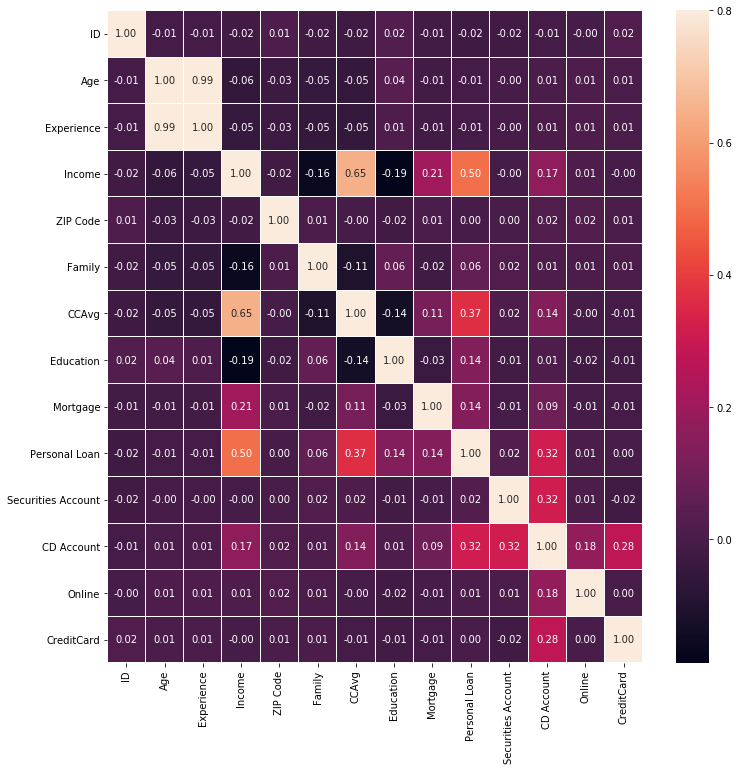

In [20]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(),vmax=.8,annot=True,linewidths=0.01,fmt='.2f')

#### Observations:

- Age and Experience are highly correlated
- Income and CCAvg are also correlated

### Splitting Data into training and test set in the ratio 70:30

In [21]:
Xi = data.drop(['ID','Personal Loan','CCAvg','Experience'],axis=1)
Xs = preprocessing.scale(Xi)
X = preprocessing.normalize(Xs)

In [22]:
y = data['Personal Loan']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=2709)

#### Logistic Regression:

In [24]:
lr_model = LogisticRegression(solver='lbfgs',max_iter=150)
lr_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=150,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
lr_model.score(X_test,y_test)

0.9686666666666667

In [26]:
lr_pred = lr_model.predict(X_test)

Accuracy :  0.9686666666666667
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1376
           1       0.91      0.69      0.78       124

    accuracy                           0.97      1500
   macro avg       0.94      0.84      0.88      1500
weighted avg       0.97      0.97      0.97      1500



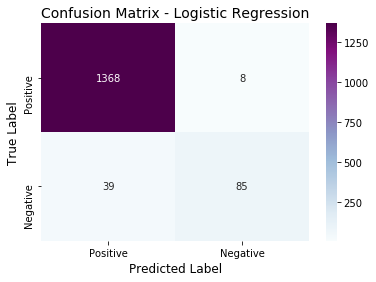

In [27]:
cm1 = confusion_matrix(y_test,lr_pred)
class_label = ["Positive", "Negative"]
df_cm1 = pd.DataFrame(cm1, index = class_label, columns = class_label)
sns.heatmap(df_cm1, annot = True, fmt = "d",cmap="BuPu")
plt.title("Confusion Matrix - Logistic Regression",fontsize=14)
plt.xlabel("Predicted Label",fontsize=12)
plt.ylabel("True Label",fontsize=12)
print("Accuracy : ", accuracy_score(y_test, lr_pred))
print("Classification Report: \n",classification_report(y_test, lr_pred))

#### KNN:

In [28]:
neighbors = np.arange(1,20,2)

In [29]:
# empty list that will hold accuracy scores
ac_scores = []
# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
    knn.fit(X_train,y_train)
    knn_pred = knn.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, knn_pred)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
k_opt = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is: %d" %k_opt)

The optimal number of neighbors is: 7


Text(0, 0.5, 'Misclassification Error')

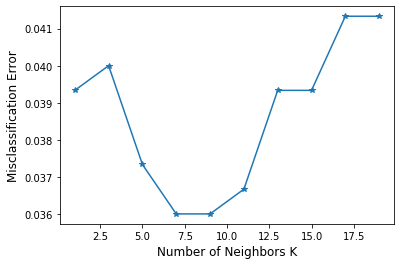

In [30]:
plt.plot(neighbors, MSE, marker="*")
plt.xlabel('Number of Neighbors K',fontsize=12)
plt.ylabel('Misclassification Error',fontsize=12)

In [31]:
knn_model = KNeighborsClassifier(n_neighbors=7, metric = 'euclidean')
knn_model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [32]:
knn_model.score(X_test,y_test)

0.964

Accuracy :  0.9586666666666667
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98      1376
           1       0.92      0.55      0.69       124

    accuracy                           0.96      1500
   macro avg       0.94      0.77      0.83      1500
weighted avg       0.96      0.96      0.95      1500



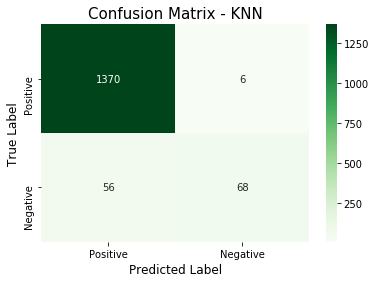

In [33]:
cm2 = confusion_matrix(y_test,knn_pred)
class_label = ["Positive", "Negative"]
df_cm2 = pd.DataFrame(cm2, index = class_label, columns = class_label)
sns.heatmap(df_cm2, annot = True, fmt = "d",cmap="Greens")
plt.title("Confusion Matrix - KNN",fontsize=15)
plt.xlabel("Predicted Label",fontsize=12)
plt.ylabel("True Label",fontsize=12)
print("Accuracy : ", accuracy_score(y_test, knn_pred))
print("Classification Report: \n",classification_report(y_test, knn_pred))

#### Naive Bayes:

In [34]:
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [35]:
nb_model.score(X_test,y_test)

0.9053333333333333

In [36]:
nb_pred = nb_model.predict(X_test)

Accuracy :  0.9053333333333333
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      1376
           1       0.43      0.44      0.43       124

    accuracy                           0.91      1500
   macro avg       0.69      0.69      0.69      1500
weighted avg       0.91      0.91      0.91      1500



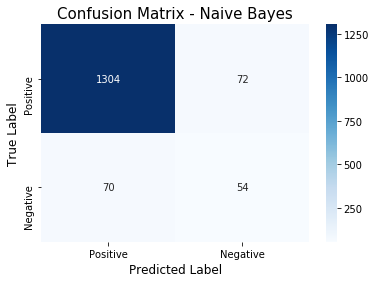

In [37]:
cm3 = confusion_matrix(y_test,nb_pred)
class_label = ["Positive", "Negative"]
df_cm3 = pd.DataFrame(cm3, index = class_label, columns = class_label)
sns.heatmap(df_cm3, annot = True, fmt = "d",cmap="Blues")
plt.title("Confusion Matrix - Naive Bayes",fontsize=15)
plt.xlabel("Predicted Label",fontsize=12)
plt.ylabel("True Label",fontsize=12)
print("Accuracy : ", accuracy_score(y_test, nb_pred))
print("Classification Report: \n",classification_report(y_test, nb_pred))

#### Model Comparison:

In [38]:
skfold = StratifiedKFold(n_splits=5)

In [39]:
result_LR = cross_val_score(LogisticRegression(solver='lbfgs'),X,y,cv=skfold)
print("Accuracy of Logistic Regression model: %.2f%% (std: %.2f%%)" % (result_LR.mean()*100.0,result_LR.std()*100))
result_KNN = cross_val_score(KNeighborsClassifier(n_neighbors=7),X_train,y_train,cv=skfold)
print("Accuracy of KNN model: %.2f%% (std: %.2f%%)" % (result_KNN.mean()*100.0,result_KNN.std()*100))
result_GNB = cross_val_score(GaussianNB(),Xi,y,cv=skfold)
print("Accuracy of Naive Bayes: %.2f%% (std: %.2f%%)" % (result_GNB.mean()*100.0,result_GNB.std()*100))
result = [result_LR,result_KNN,result_GNB]

Accuracy of Logistic Regression model: 95.50% (std: 0.25%)
Accuracy of KNN model: 95.40% (std: 0.51%)
Accuracy of Naive Bayes: 90.28% (std: 0.47%)


----
#### Summary

- The aim of Thera Bank is to convert their Liability customers into Loan Customers.
- Classification algorithms (Logistic Regression, KNN and Naive Bayes) were used in this study.
- From data analysis, it can be seen that <strong>'Logistic Regression'</strong> have the highest score <strong>(96.8%)</strong> and accuracy <strong>(95.5%)</strong> and it can be chosen as the best model for this case study.